# Laboratorio 10

## ChatGPT y Data Science

### Integrantes:
* Andres de la Roca
* Jun Woo Lee

## Analisis Exploratorio de Datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px
import plotly.tools as tls
import plotly.io as pio
import pyreadstat

### Carga y Limpieza de datos

In [3]:
data_hogar, meta_hogar = pyreadstat.read_sav("Datos_Lab/ENCOVI_Hogar.sav")
data_personas, meta_personas = pyreadstat.read_sav("Datos_Lab/ENCOVI_Personas.sav")

df_hogar = pd.DataFrame(data_hogar)
df_personas = pd.DataFrame(data_personas)


In [4]:
df_hogar

,REGION,DEPTO,AREA,UPM,NUMHOG,FACTOR,FACTOR3,POBREZA,THOGAR,PPB01,...,P01H10,P01H11,P01H12,P01H13,P01H14,P01H15,P01H16,DIA_ENC,MES_ENC,A_ENC
0,1.0,1.0,1.0,1.0,1.0,525.0,1575.0,3.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,8.0,2014.0
1,1.0,1.0,1.0,1.0,2.0,525.0,1575.0,3.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,8.0,2014.0
2,1.0,1.0,1.0,1.0,3.0,525.0,9450.0,2.0,18.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22.0,8.0,2014.0
3,1.0,1.0,1.0,1.0,4.0,525.0,3150.0,2.0,6.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,24.0,8.0,2014.0
4,1.0,1.0,1.0,1.0,5.0,525.0,1575.0,3.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,8.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,8.0,17.0,2.0,833.0,11532.0,305.0,915.0,3.0,3.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,12.0,2014.0
11532,8.0,17.0,2.0,833.0,11533.0,305.0,3355.0,1.0,11.0,2.0,...,1.0,1.0,2.0,1.0,1.0,2.0,2.0,5.0,12.0,2014.0
11533,8.0,17.0,2.0,833.0,11534.0,305.0,1220.0,2.0,4.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,12.0,2014.0
11534,8.0,17.0,2.0,833.0,11535.0,305.0,915.0,3.0,3.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,12.0,2014.0


In [5]:
df_personas

,REGION,DEPTO,AREA,UPM,NUMHOG,FACTOR,POBREZA,THOGAR,ID,PPA02,...,P11A10A,P11A10B,P11B01A,P11B01B,P11B02A,P11B02B,P11B03A,P11B03B,P11B04A,P11B04B
0,1.0,1.0,1.0,1.0,1.0,525.0,3.0,3.0,1.0,1.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
1,1.0,1.0,1.0,1.0,1.0,525.0,3.0,3.0,2.0,2.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
2,1.0,1.0,1.0,1.0,1.0,525.0,3.0,3.0,3.0,2.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
3,1.0,1.0,1.0,1.0,2.0,525.0,3.0,3.0,1.0,2.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
4,1.0,1.0,1.0,1.0,2.0,525.0,3.0,3.0,2.0,1.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54817,8.0,17.0,2.0,833.0,11536.0,305.0,1.0,6.0,2.0,2.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
54818,8.0,17.0,2.0,833.0,11536.0,305.0,1.0,6.0,3.0,1.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
54819,8.0,17.0,2.0,833.0,11536.0,305.0,1.0,6.0,4.0,2.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
54820,8.0,17.0,2.0,833.0,11536.0,305.0,1.0,6.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def normalizar_columnas(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [7]:
# Normalizar nombres de columnas de df_hogar y df_personas

normalizar_columnas(df_hogar)
normalizar_columnas(df_personas)

C:\Users\Jun\AppData\Local\Temp\ipykernel_55252\3041744455.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\Jun\AppData\Local\Temp\ipykernel_55252\3041744455.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\Jun\AppData\Local\Temp\ipykernel_55252\3041744455.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\Jun\AppData\Local\Temp\ipykernel_55252\3041744455.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character reg

In [8]:
df_hogar

,region,depto,area,upm,numhog,factor,factor3,pobreza,thogar,ppb01,...,p01h10,p01h11,p01h12,p01h13,p01h14,p01h15,p01h16,dia_enc,mes_enc,a_enc
0,1.0,1.0,1.0,1.0,1.0,525.0,1575.0,3.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,8.0,2014.0
1,1.0,1.0,1.0,1.0,2.0,525.0,1575.0,3.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,8.0,2014.0
2,1.0,1.0,1.0,1.0,3.0,525.0,9450.0,2.0,18.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22.0,8.0,2014.0
3,1.0,1.0,1.0,1.0,4.0,525.0,3150.0,2.0,6.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,24.0,8.0,2014.0
4,1.0,1.0,1.0,1.0,5.0,525.0,1575.0,3.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,8.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,8.0,17.0,2.0,833.0,11532.0,305.0,915.0,3.0,3.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,12.0,2014.0
11532,8.0,17.0,2.0,833.0,11533.0,305.0,3355.0,1.0,11.0,2.0,...,1.0,1.0,2.0,1.0,1.0,2.0,2.0,5.0,12.0,2014.0
11533,8.0,17.0,2.0,833.0,11534.0,305.0,1220.0,2.0,4.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,12.0,2014.0
11534,8.0,17.0,2.0,833.0,11535.0,305.0,915.0,3.0,3.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,12.0,2014.0


In [9]:
df_personas

,region,depto,area,upm,numhog,factor,pobreza,thogar,id,ppa02,...,p11a10a,p11a10b,p11b01a,p11b01b,p11b02a,p11b02b,p11b03a,p11b03b,p11b04a,p11b04b
0,1.0,1.0,1.0,1.0,1.0,525.0,3.0,3.0,1.0,1.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
1,1.0,1.0,1.0,1.0,1.0,525.0,3.0,3.0,2.0,2.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
2,1.0,1.0,1.0,1.0,1.0,525.0,3.0,3.0,3.0,2.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
3,1.0,1.0,1.0,1.0,2.0,525.0,3.0,3.0,1.0,2.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
4,1.0,1.0,1.0,1.0,2.0,525.0,3.0,3.0,2.0,1.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54817,8.0,17.0,2.0,833.0,11536.0,305.0,1.0,6.0,2.0,2.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
54818,8.0,17.0,2.0,833.0,11536.0,305.0,1.0,6.0,3.0,1.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
54819,8.0,17.0,2.0,833.0,11536.0,305.0,1.0,6.0,4.0,2.0,...,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN
54820,8.0,17.0,2.0,833.0,11536.0,305.0,1.0,6.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Visualizar datos faltantes en df_hogar

print('Datos faltantes en df_hogar: \n', df_hogar.isnull().sum())

# Visualizar datos faltantes en df_personas

print('\nDatos faltantes en df_personas: \n', df_personas.isnull().sum())

Datos faltantes en df_hogar: 
 region        0
depto         0
area          0
upm           0
numhog        0
           ... 
p01h15     2641
p01h16     2641
dia_enc       0
mes_enc       1
a_enc         1
Length: 163, dtype: int64

Datos faltantes en df_personas: 
 region         0
depto          0
area           0
upm            0
numhog         0
           ...  
p11b02b    54247
p11b03a     8999
p11b03b    54612
p11b04a     9001
p11b04b    54549
Length: 465, dtype: int64


In [11]:
# Interpolar valores falsos en df_hogar
df_hogar.interpolate(method = "linear", inplace=True)

In [12]:
# Interpolar valores falsos en df_personas
df_personas.interpolate(method = "linear", inplace=True)

In [13]:
df_hogar.fillna(df_hogar.mean(), inplace=True)

df_personas.fillna(df_hogar.mean(), inplace=True)

C:\Users\Jun\AppData\Local\Temp\ipykernel_55252\2412572202.py:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Jun\AppData\Local\Temp\ipykernel_55252\2412572202.py:3: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [14]:
# Visualizar datos faltantes en df_hogar

print('Datos faltantes en df_hogar: \n', df_hogar.isnull().sum())

# Visualizar datos faltantes en df_personas

print('\nDatos faltantes en df_personas: \n', df_personas.isnull().sum())

Datos faltantes en df_hogar: 
 region     0
depto      0
area       0
upm        0
numhog     0
          ..
p01h15     0
p01h16     0
dia_enc    0
mes_enc    0
a_enc      0
Length: 163, dtype: int64

Datos faltantes en df_personas: 
 region       0
depto        0
area         0
upm          0
numhog       0
          ... 
p11b02b    942
p11b03a      0
p11b03b    310
p11b04a      0
p11b04b    396
Length: 465, dtype: int64


In [15]:
columns_with_missing_values = df_personas.columns[df_personas.isna().any()].tolist()  # or df.columns[df.isnull().any()].tolist()

# columns_with_missing_values

df_personas.drop(columns=columns_with_missing_values, inplace=True)

In [16]:
# Drop columns which name starts with P except Pobreza
columns_to_keep = [column for column in df_hogar.columns if not (column.startswith('p') and column != 'pobreza')]

df_hogar = df_hogar[columns_to_keep]

columns_to_keep = [column for column in df_personas.columns if not (column.startswith('p') and column != 'pobreza')]

df_personas = df_personas[columns_to_keep]

In [17]:
# Drop columns which name starts with id
columns_to_keep = [column for column in df_hogar.columns if not column.startswith('id')]
df_hogar = df_hogar[columns_to_keep]

columns_to_keep = [column for column in df_personas.columns if not column.startswith('id')]
df_personas = df_personas[columns_to_keep]

### Analisis univariable

In [18]:
# Estadisticas descriptivas de df_hogar

df_hogar.describe()

,region,depto,area,upm,numhog,factor,factor3,pobreza,thogar,dia_enc,mes_enc,a_enc
count,11536.000000,11536.000000,11536.00000,11536.000000,11536.000000,11536.000000,11536.000000,11536.000000,11536.000000,11536.000000,11536.000000,11536.000000
mean,4.599515,10.464719,1.54525,518.861477,5768.500000,290.697220,1387.136269,2.323422,4.752254,16.528346,9.131935,2014.107056
std,1.890770,6.674172,0.49797,300.271095,3330.300687,282.151314,1648.180032,0.741390,2.355452,7.759524,2.823077,0.309198
min,1.000000,1.000000,1.00000,1.000000,1.000000,13.000000,13.000000,1.000000,1.000000,1.000000,1.000000,2014.000000
25%,3.000000,4.000000,1.00000,258.000000,2884.750000,128.000000,476.000000,2.000000,3.000000,10.000000,8.000000,2014.000000
50%,5.000000,10.000000,2.00000,522.500000,5768.500000,207.000000,895.000000,2.000000,4.000000,17.000000,10.000000,2014.000000
75%,6.000000,16.000000,2.00000,779.000000,8652.250000,340.000000,1656.000000,3.000000,6.000000,22.000000,11.000000,2014.000000
max,8.000000,22.000000,2.00000,1037.000000,11536.000000,2398.000000,25751.000000,3.000000,20.000000,31.000000,12.000000,2015.000000


In [19]:
# Estadisticas descriptivas de df_personas

df_personas.describe()

,region,depto,area,upm,numhog,factor,pobreza,thogar
count,54822.000000,54822.000000,54822.000000,54822.000000,54822.000000,54822.000000,54822.000000,54822.000000
mean,4.694849,10.708894,1.582412,531.359290,5948.701215,291.890190,2.142461,5.919631
std,1.883416,6.518859,0.493166,292.372677,3337.015133,281.990073,0.774229,2.638153
min,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,1.000000,1.000000
25%,3.000000,5.000000,1.000000,283.000000,3069.250000,130.000000,2.000000,4.000000
50%,5.000000,10.000000,2.000000,542.000000,6049.000000,209.000000,2.000000,5.000000
75%,6.000000,16.000000,2.000000,776.000000,8882.000000,341.000000,3.000000,7.000000
max,8.000000,22.000000,2.000000,1037.000000,11536.000000,2398.000000,3.000000,20.000000


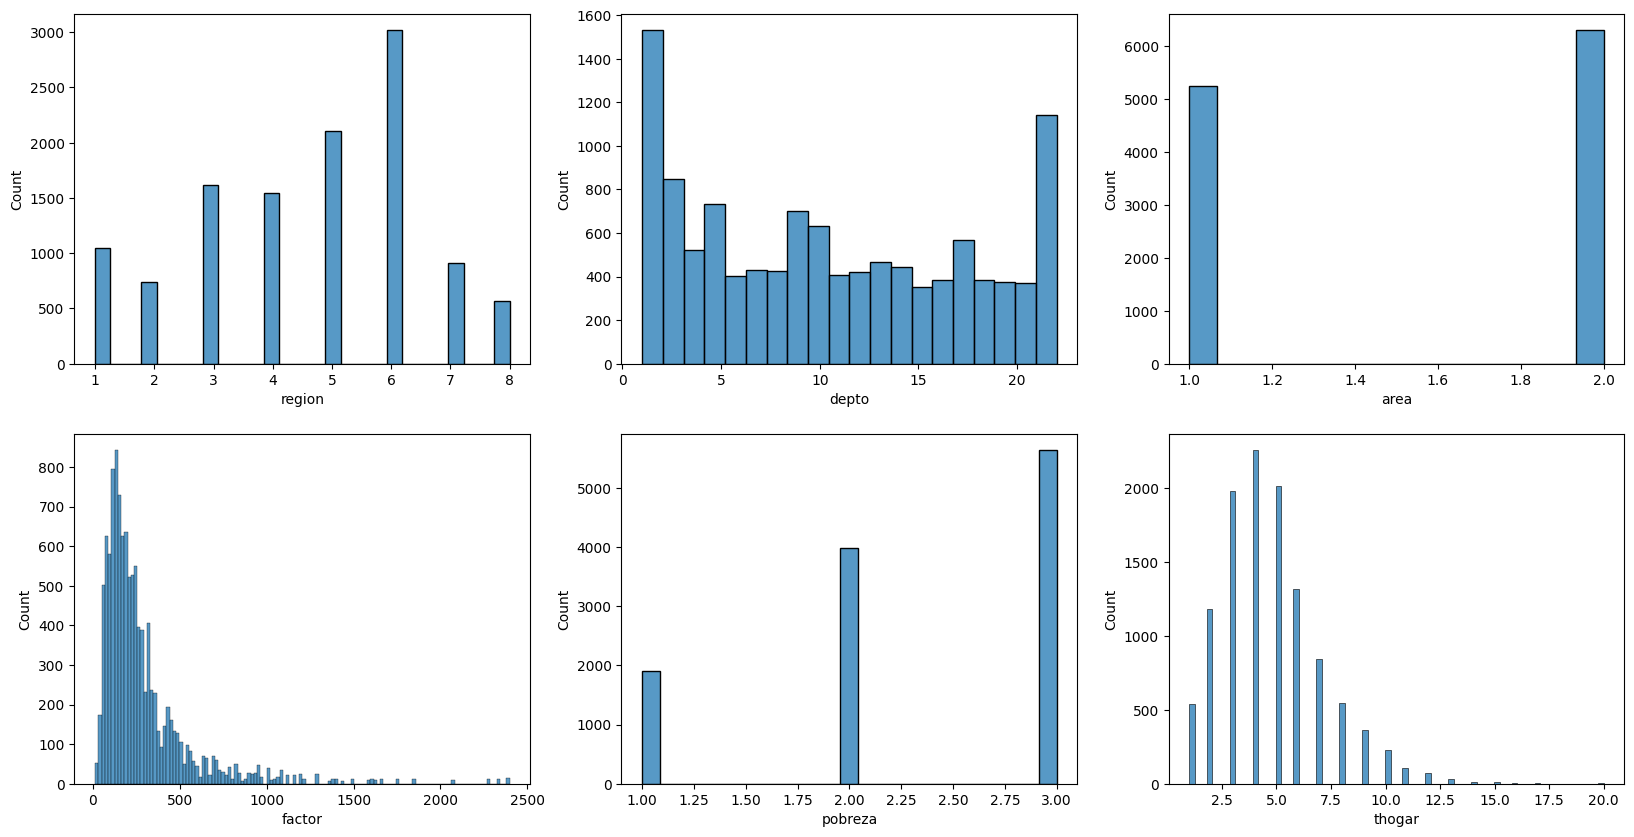

In [20]:
# Distribuciones de variables region, depto, area, factor, pobreza y thogar en df_hogar

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.histplot(df_hogar['region'], ax=ax[0, 0])
sns.histplot(df_hogar['depto'], ax=ax[0, 1])
sns.histplot(df_hogar['area'], ax=ax[0, 2])
sns.histplot(df_hogar['factor'], ax=ax[1, 0])
sns.histplot(df_hogar['pobreza'], ax=ax[1, 1])
sns.histplot(df_hogar['thogar'], ax=ax[1, 2])
plt.show()

<AxesSubplot: xlabel='thogar', ylabel='Count'>

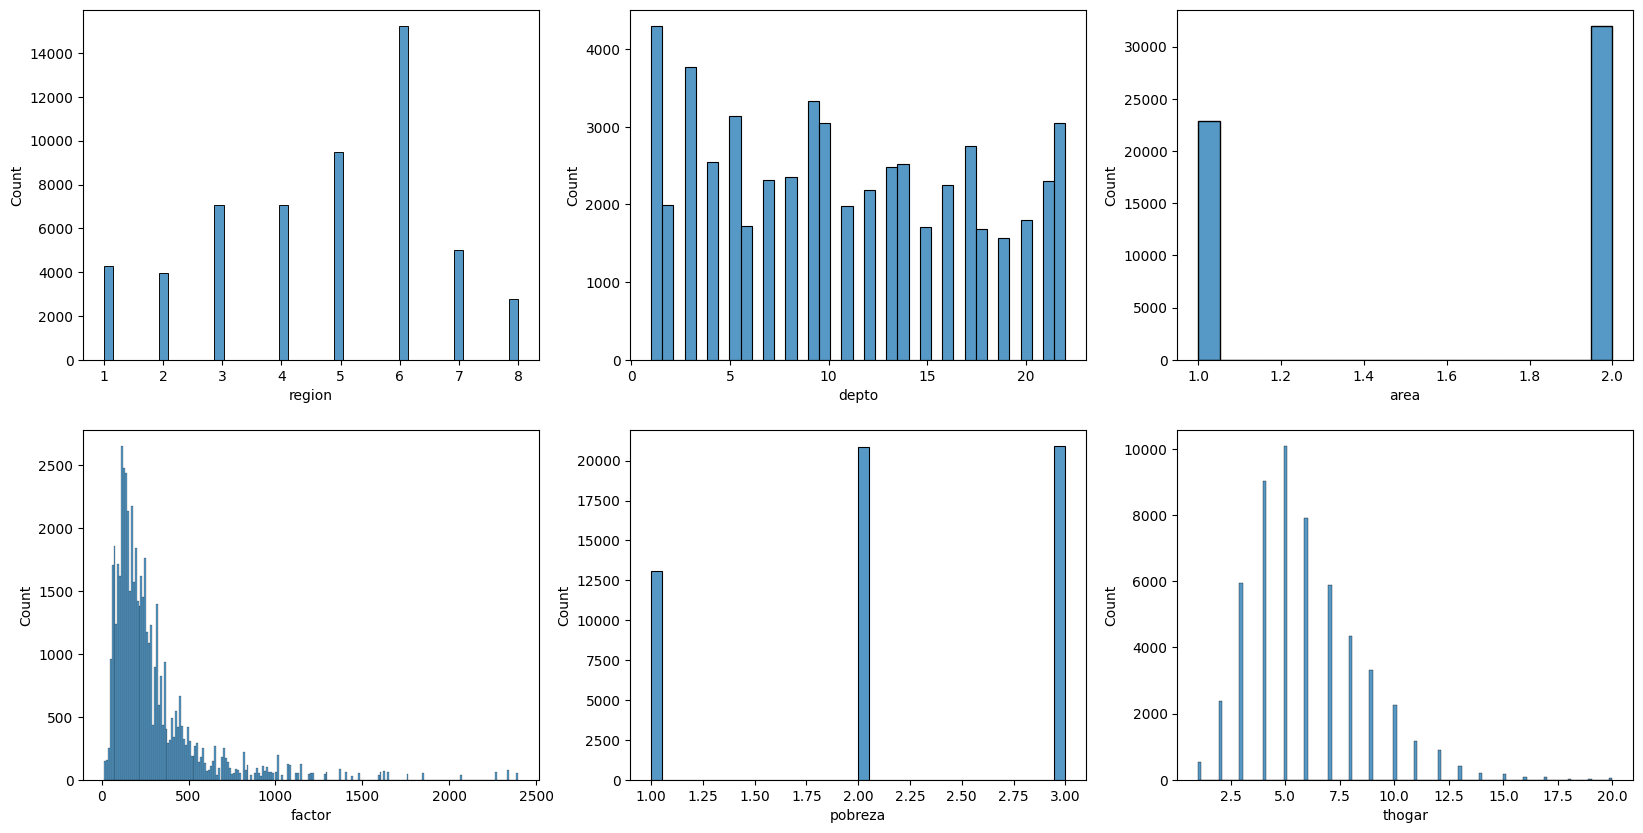

In [21]:
# Distribuciones de variables en df_personas

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.histplot(df_personas['region'], ax=ax[0, 0])
sns.histplot(df_personas['depto'], ax=ax[0, 1])
sns.histplot(df_personas['area'], ax=ax[0, 2])
sns.histplot(df_personas['factor'], ax=ax[1, 0])
sns.histplot(df_personas['pobreza'], ax=ax[1, 1])
sns.histplot(df_personas['thogar'], ax=ax[1, 2])

### Analisis bivariable

C:\Users\Jun\AppData\Local\Temp\ipykernel_55252\1295417160.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



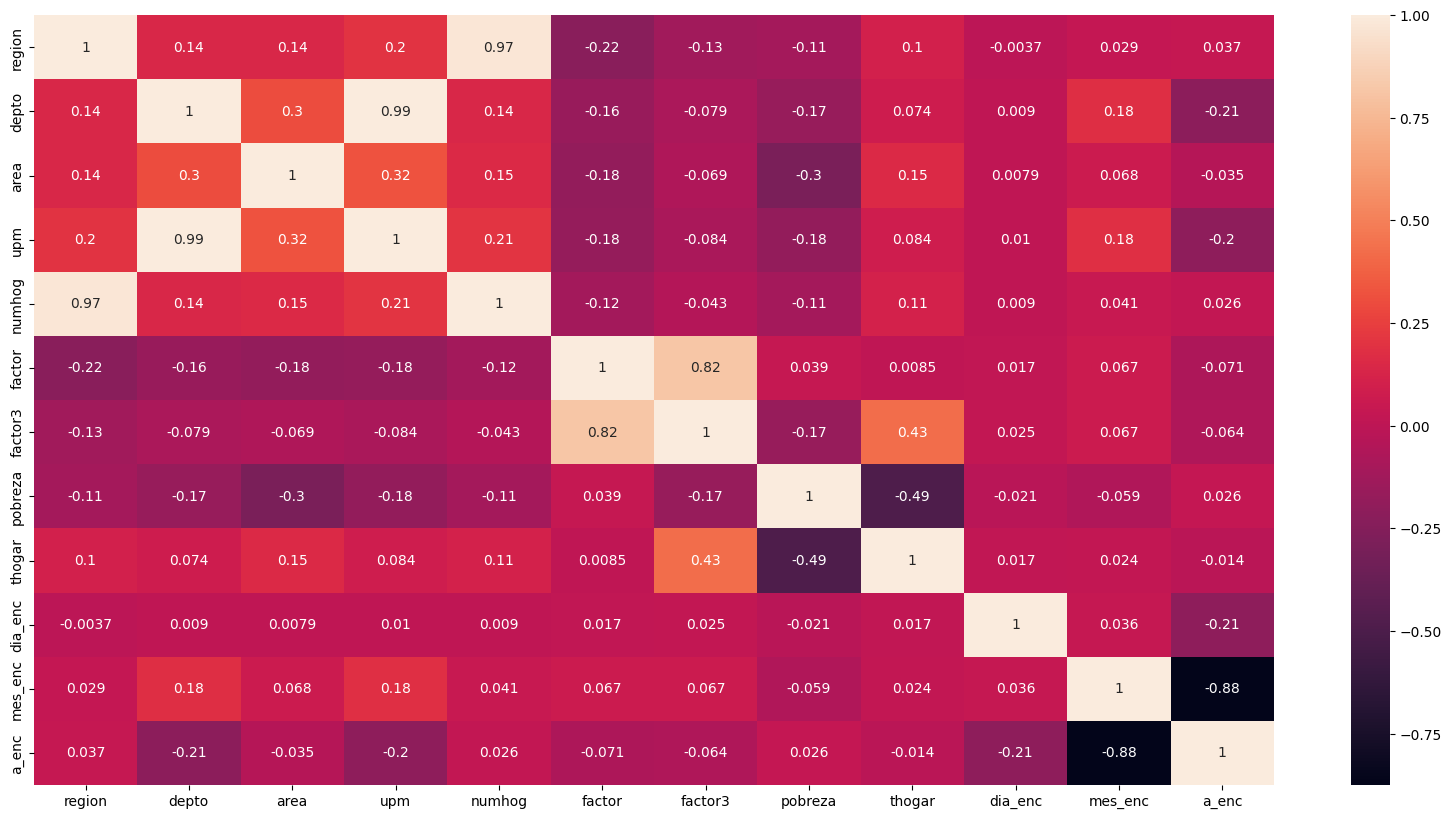

In [22]:
# Correlaciones entre variables en df_hogar

plt.figure(figsize=(20, 10))
sns.heatmap(df_hogar.corr(), annot=True)
plt.show()

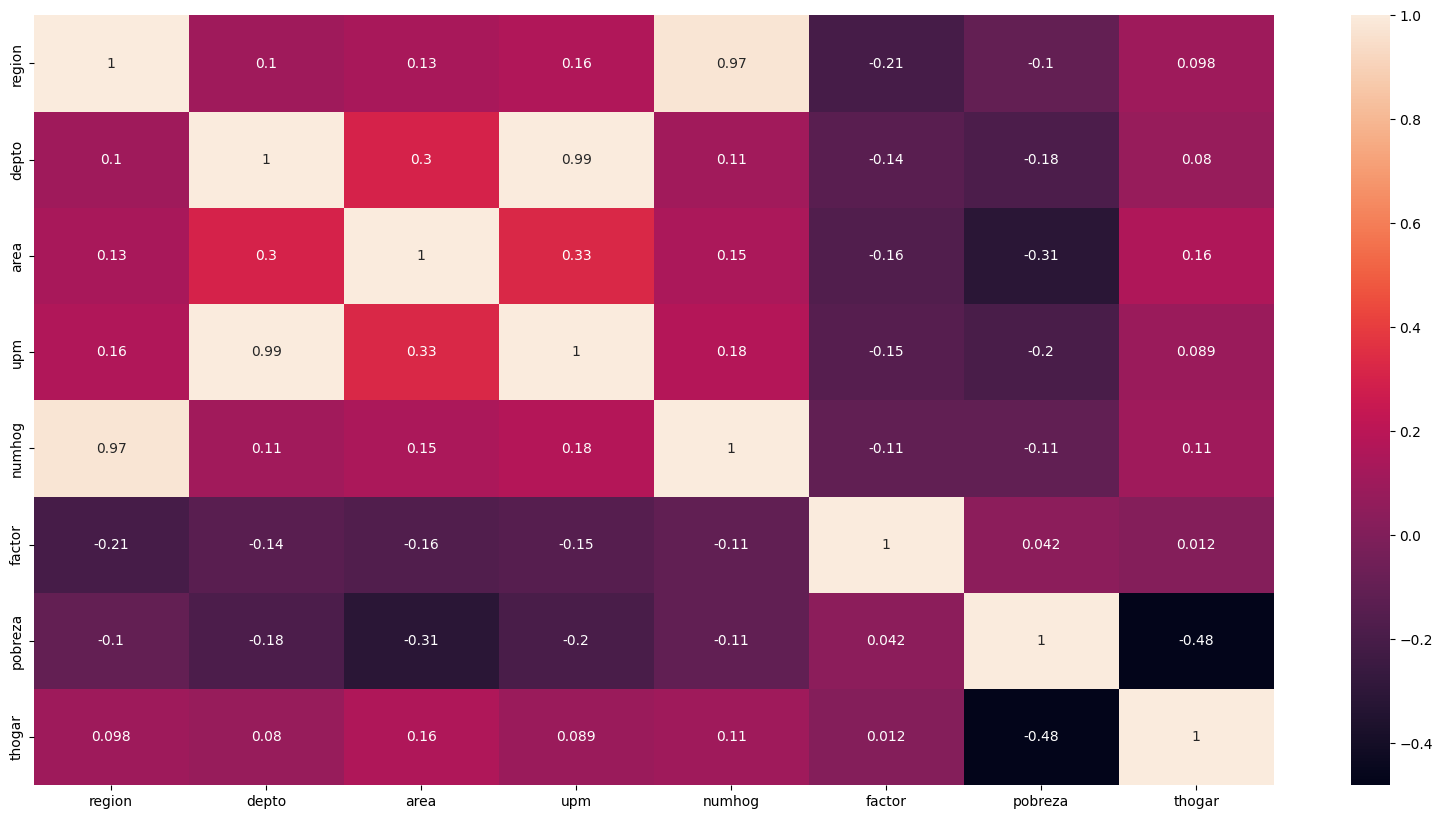

In [23]:
# Correlaciones entre variables en df_personas

plt.figure(figsize=(20, 10))
sns.heatmap(df_personas.corr(), annot=True)
plt.show()

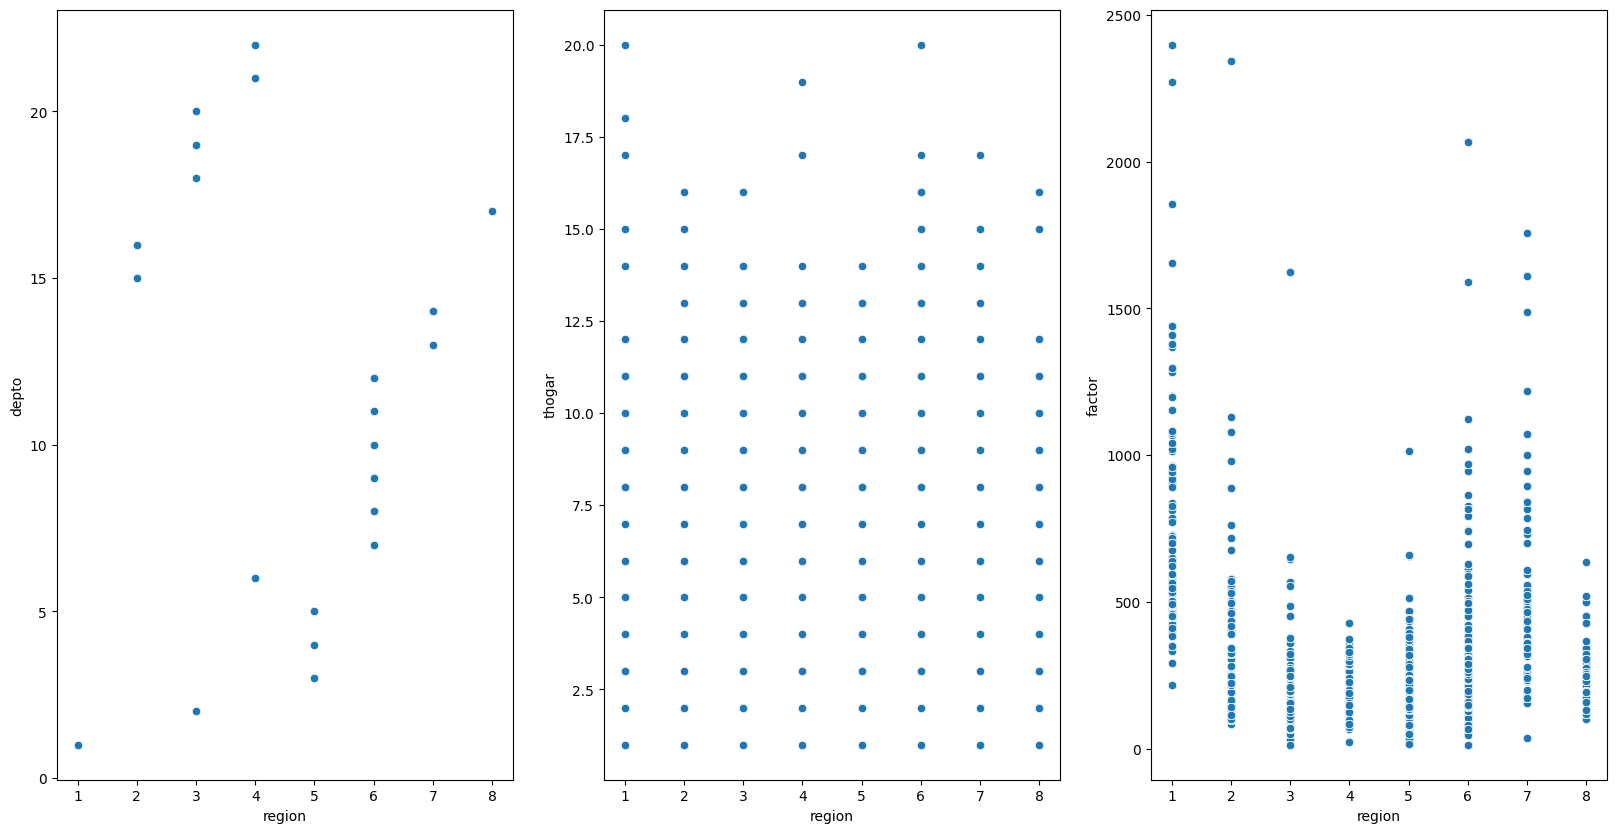

In [24]:
# Graficar relacion entre variables df_hogar

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
sns.scatterplot(data=df_hogar, x='region', y='depto', ax=ax[0])
sns.scatterplot(data=df_hogar, x='region', y='thogar', ax=ax[1])
sns.scatterplot(data=df_hogar, x='region', y='factor', ax=ax[2])
plt.show()

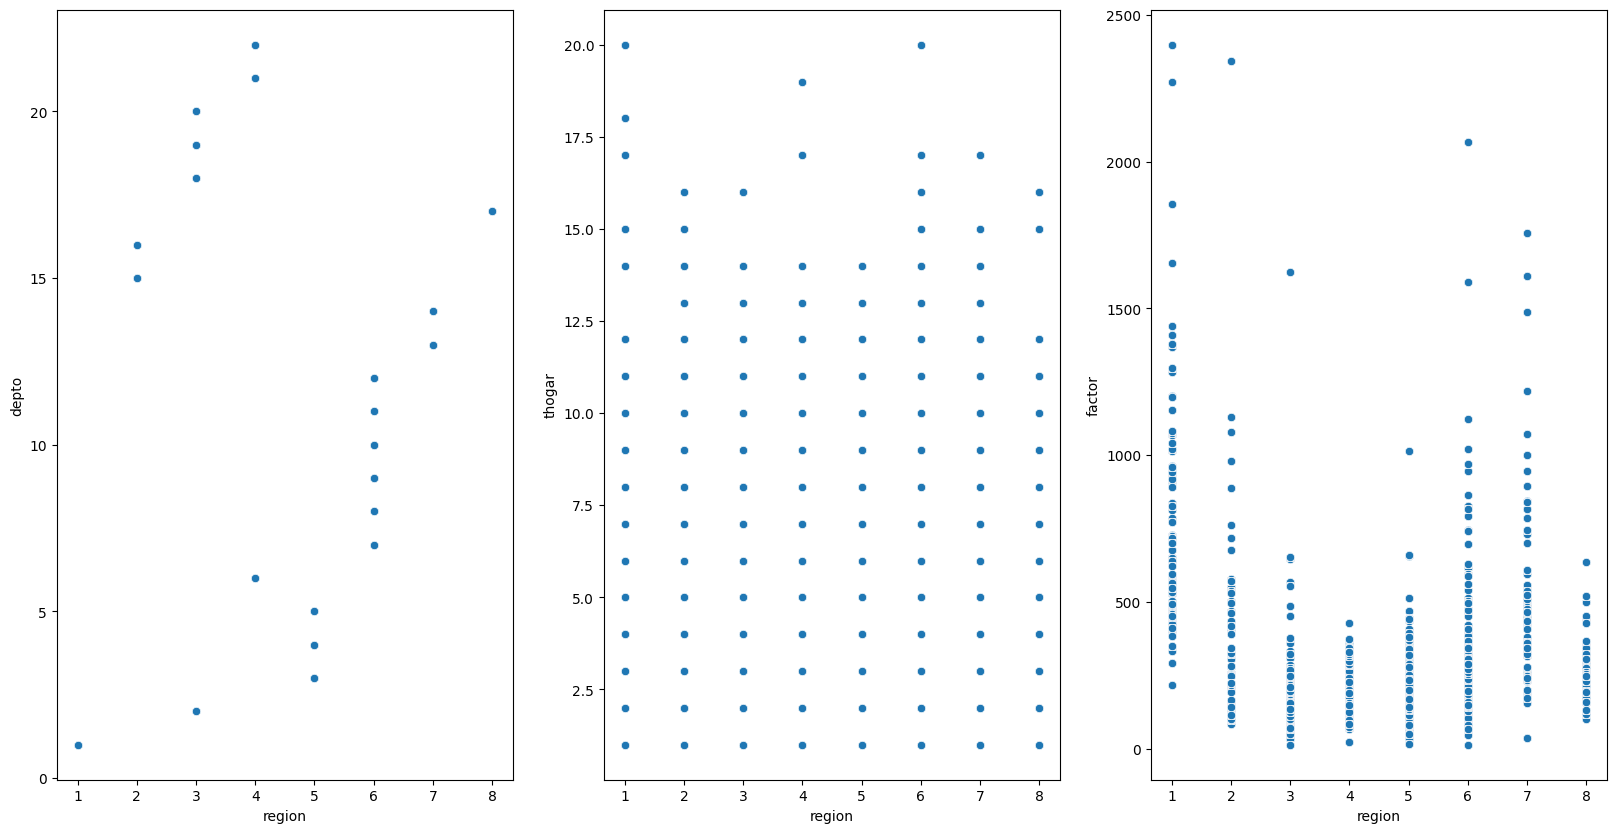

In [25]:
# Graficar relacion entre variables df_personas

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
sns.scatterplot(data=df_personas, x='region', y='depto', ax=ax[0])
sns.scatterplot(data=df_personas, x='region', y='thogar', ax=ax[1])
sns.scatterplot(data=df_personas, x='region', y='factor', ax=ax[2])
plt.show()


### Visualizacion de datos

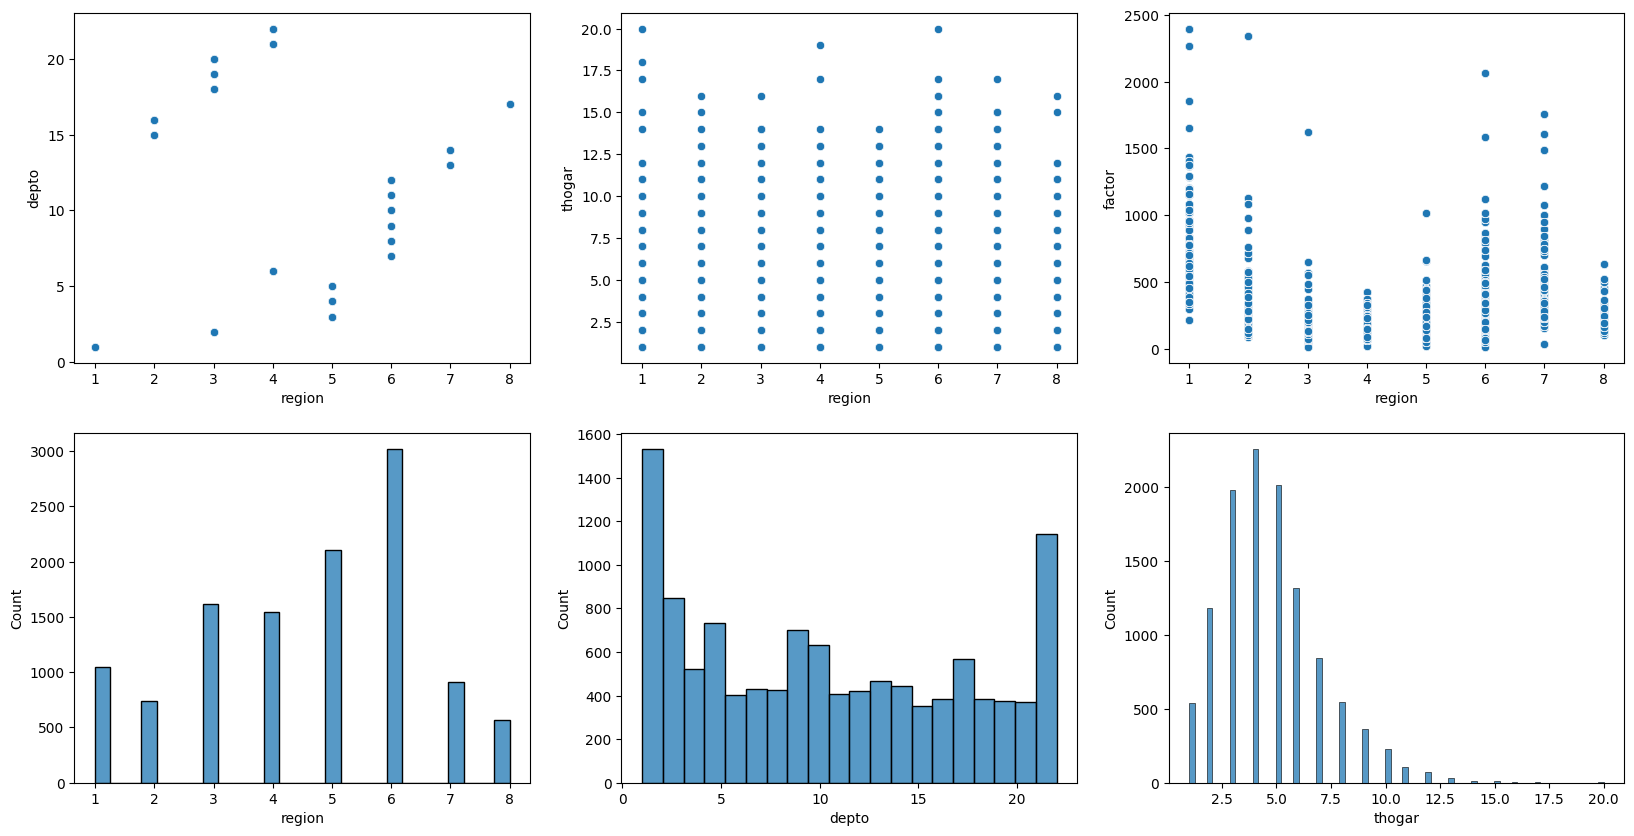

In [26]:
# Graficos para representar la relacion entre variables en df_hogar y sus distribuciones df_hogar

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.scatterplot(data=df_hogar, x='region', y='depto', ax=ax[0, 0])
sns.histplot(df_hogar['region'], ax=ax[1, 0])
sns.histplot(df_hogar['depto'], ax=ax[1, 1])
sns.scatterplot(data=df_hogar, x='region', y='thogar', ax=ax[0, 1])
sns.histplot(df_hogar['thogar'], ax=ax[1, 2])
sns.scatterplot(data=df_hogar, x='region', y='factor', ax=ax[0, 2])
plt.show()

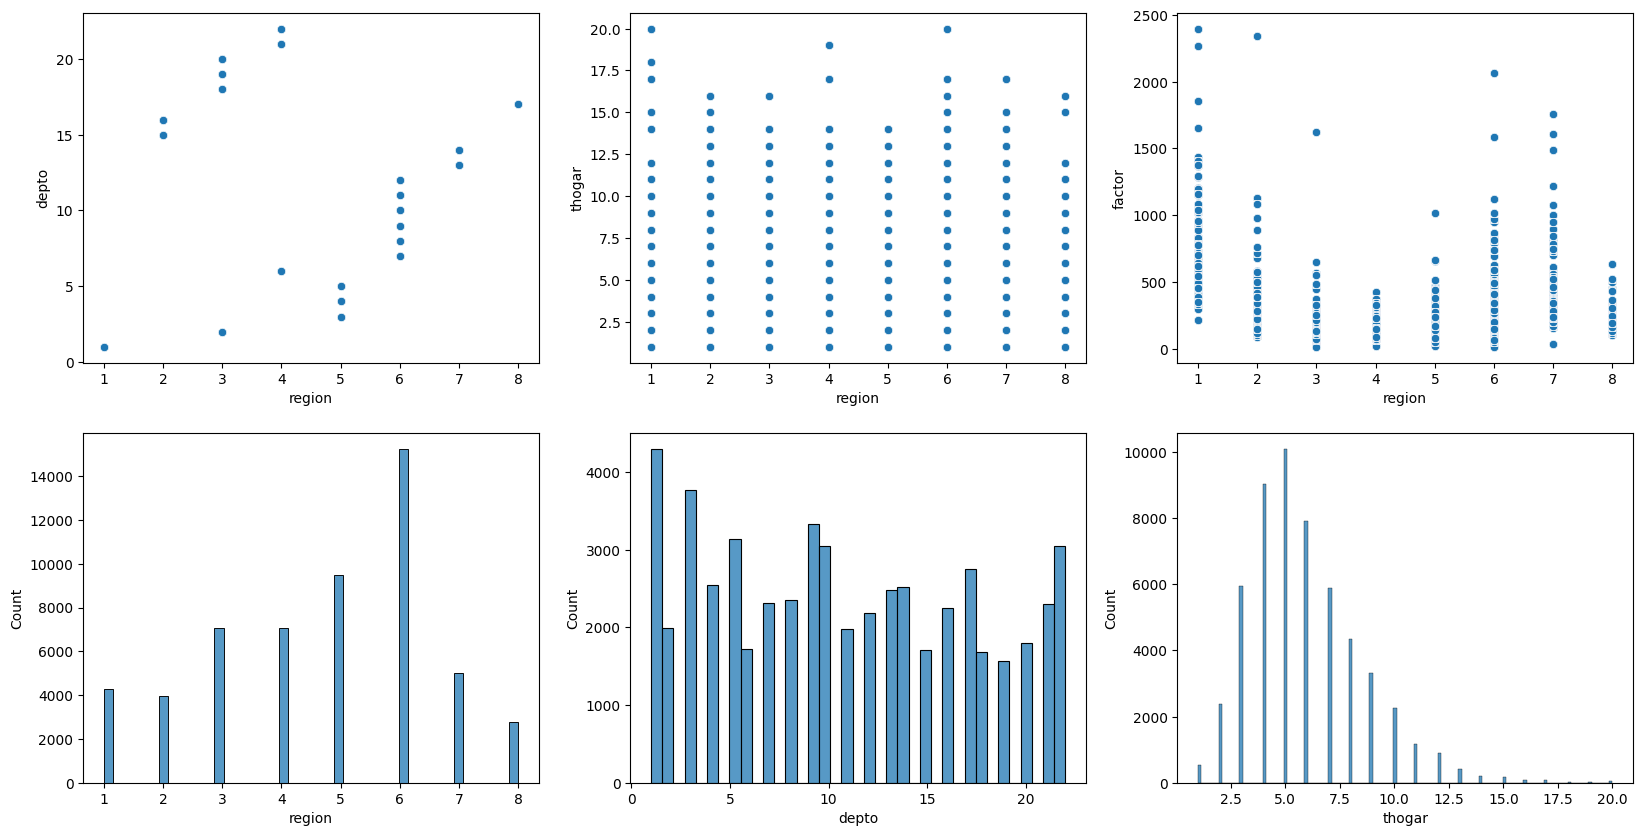

In [27]:
# Graficos para representar la relacion entre variables en df_personas y sus distribuciones df_personas

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.scatterplot(data=df_personas, x='region', y='depto', ax=ax[0, 0])
sns.histplot(df_personas['region'], ax=ax[1, 0])
sns.histplot(df_personas['depto'], ax=ax[1, 1])
sns.scatterplot(data=df_personas, x='region', y='thogar', ax=ax[0, 1])
sns.histplot(df_personas['thogar'], ax=ax[1, 2])
sns.scatterplot(data=df_personas, x='region', y='factor', ax=ax[0, 2])
plt.show()


## Modelado y Pruebas

### Preparacion de datos

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [65]:
# Define a threshold for poverty, this is an arbitrary example
poverty_threshold = 2

# Binarize 'pobreza'
df_hogar['pobreza'] = (df_hogar['pobreza'] > poverty_threshold).astype(int)
df_personas['pobreza'] = (df_personas['pobreza'] > poverty_threshold).astype(int)

# Check the binarization
print(df_hogar['pobreza'].value_counts())
print(df_personas['pobreza'].value_counts())

0    11536
Name: pobreza, dtype: int64
0    54822
Name: pobreza, dtype: int64


In [58]:
# Splitting the data for df_hogar
X_hogar = df_hogar.drop('pobreza', axis=1)
y_hogar = df_hogar['pobreza']
X_train_hogar, X_test_hogar, y_train_hogar, y_test_hogar = train_test_split(X_hogar, y_hogar, test_size=0.2, random_state=42)

# Splitting the data for df_personas
X_personas = df_personas.drop('pobreza', axis=1)
y_personas = df_personas['pobreza']
X_train_personas, X_test_personas, y_train_personas, y_test_personas = train_test_split(X_personas, y_personas, test_size=0.2, random_state=42)

### Construccion del modelo

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
# Initialize the RandomForestClassifier
rf_classifier_hogar = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_personas = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier_hogar.fit(X_train_hogar, y_train_hogar)
rf_classifier_personas.fit(X_train_personas, y_train_personas)

RandomForestClassifier(random_state=42)

### Evaluacion del modelo

In [61]:
# Predict on the test data
y_pred_hogar = rf_classifier_hogar.predict(X_test_hogar)
y_pred_personas = rf_classifier_personas.predict(X_test_personas)

# Generate classification report
from sklearn.metrics import classification_report

report_hogar = classification_report(y_test_hogar, y_pred_hogar)
report_personas = classification_report(y_test_personas, y_pred_personas)

print("Classification Report for df_hogar:\n", report_hogar)
print("Classification Report for df_personas:\n", report_personas)

Classification Report for df_hogar:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      1239
           1       0.71      0.72      0.71      1069

    accuracy                           0.73      2308
   macro avg       0.73      0.73      0.73      2308
weighted avg       0.73      0.73      0.73      2308

Classification Report for df_personas:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6829
           1       0.99      0.99      0.99      4136

    accuracy                           0.99     10965
   macro avg       0.99      0.99      0.99     10965
weighted avg       0.99      0.99      0.99     10965



### Optimizacion y ajuste

In [63]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_hogar, y_train_hogar)

# Predict on the test data using the best model
y_pred_hogar = grid_search.best_estimator_.predict(X_test_hogar)

# Generate classification report
report_hogar = classification_report(y_test_hogar, y_pred_hogar)


# Repeat the process for df_personas
grid_search.fit(X_train_personas, y_train_personas)
y_pred_personas = grid_search.best_estimator_.predict(X_test_personas)
report_personas = classification_report(y_test_personas, y_pred_personas)



Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [64]:
print("Classification Report for df_hogar after hyperparameter tuning:\n", report_hogar)
print("Classification Report for df_personas after hyperparameter tuning:\n", report_personas)

Classification Report for df_hogar after hyperparameter tuning:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76      1239
           1       0.72      0.76      0.74      1069

    accuracy                           0.75      2308
   macro avg       0.75      0.75      0.75      2308
weighted avg       0.75      0.75      0.75      2308

Classification Report for df_personas after hyperparameter tuning:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6829
           1       0.99      0.99      0.99      4136

    accuracy                           0.99     10965
   macro avg       0.99      0.99      0.99     10965
weighted avg       0.99      0.99      0.99     10965

